<a href="https://colab.research.google.com/github/Zem-0/Stock_price_prediction_LSTM-DeepLearningModel/blob/main/LSTM_Prediction_nvda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/nvda (3).csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037618,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041559,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038334,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038215,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038095,227520000
...,...,...,...,...,...,...,...
6473,2024-10-14,136.470001,139.600006,136.300003,138.070007,138.070007,232347700
6474,2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000
6475,2024-10-16,133.979996,136.619995,131.580002,135.720001,135.720001,264879700
6476,2024-10-17,139.339996,140.889999,136.869995,136.929993,136.929993,306435900


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536
...,...,...
6473,2024-10-14,138.070007
6474,2024-10-15,131.600006
6475,2024-10-16,135.720001
6476,2024-10-17,136.929993


In [3]:
df['Date']

,Date
0,1999-01-22
1,1999-01-25
2,1999-01-26
3,1999-01-27
4,1999-01-28
...,...
6473,2024-10-14
6474,2024-10-15
6475,2024-10-16
6476,2024-10-17


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-5-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,1999-01-22
1,1999-01-25
2,1999-01-26
3,1999-01-27
4,1999-01-28
...,...
6473,2024-10-14
6474,2024-10-15
6475,2024-10-16
6476,2024-10-17


In [6]:
df.index = df.pop('Date')
df

,Close
Date,
1999-01-22,0.041016
1999-01-25,0.045313
1999-01-26,0.041797
1999-01-27,0.041667
1999-01-28,0.041536
...,...
2024-10-14,138.070007
2024-10-15,131.600006
2024-10-16,135.720001


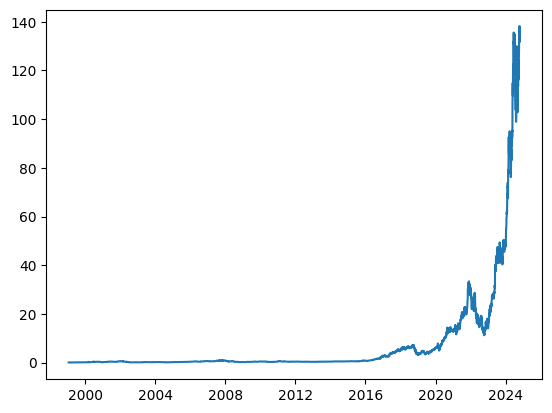

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error:  {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-01-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,13.186250,13.070750,12.643000,12.535250
1,2021-03-26,13.070750,12.643000,12.535250,12.839250
2,2021-03-29,12.643000,12.535250,12.839250,12.948250
3,2021-03-30,12.535250,12.839250,12.948250,12.871750
4,2021-03-31,12.839250,12.948250,12.871750,13.348250
...,...,...,...,...,...
707,2024-01-17,54.821999,54.709999,56.382000,56.053001
708,2024-01-18,54.709999,56.382000,56.053001,57.106998
709,2024-01-19,56.382000,56.053001,57.106998,59.491001
710,2024-01-22,56.053001,57.106998,59.491001,59.653999


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((712,), (712, 3, 1), (712,))

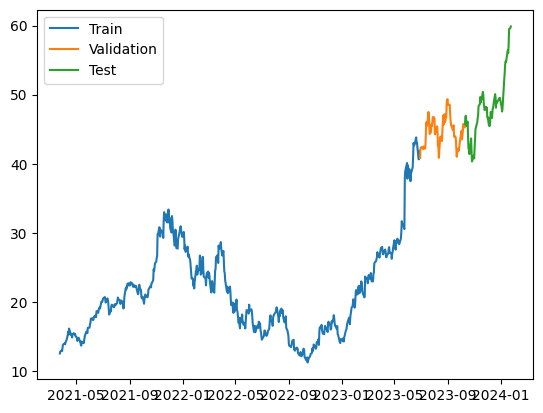

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 508.7675 - mean_absolute_error: 21.5279 - val_loss: 1889.1554 - val_mean_absolute_error: 43.4151
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 405.6043 - mean_absolute_error: 19.0987 - val_loss: 1660.6466 - val_mean_absolute_error: 40.6970
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 266.3422 - mean_absolute_error: 14.8270 - val_loss: 1119.7849 - val_mean_absolute_error: 33.3920
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81.2175 - mean_absolute_error: 6.7973 - val_loss: 528.1862 - val_mean_absolute_error: 22.8759
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.6807 - mean_absolute_error: 5.8883 - val_loss: 520.1526 - val_mean_absolute_error: 22.7081
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.6056 - mean_absolute_error: 4.6874 - val_loss: 536.2458 - val_mean_absolute_error: 23.0630
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.9193 - mea

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


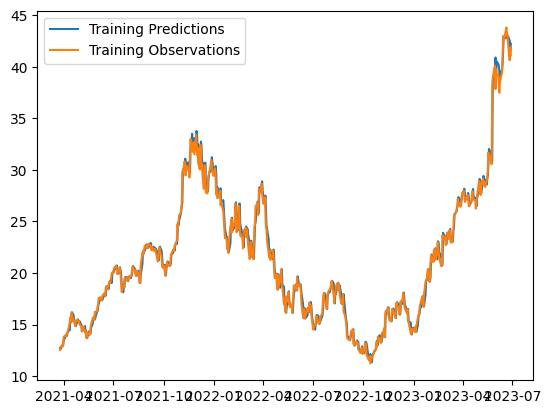

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


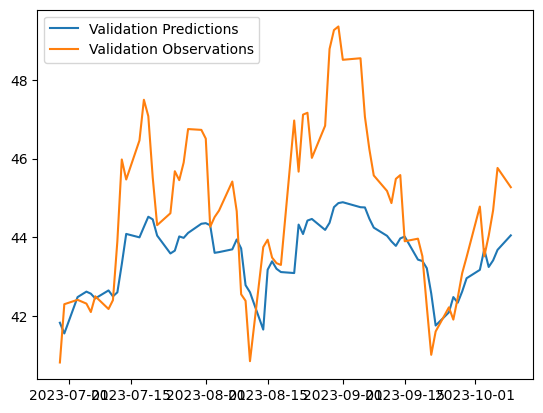

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


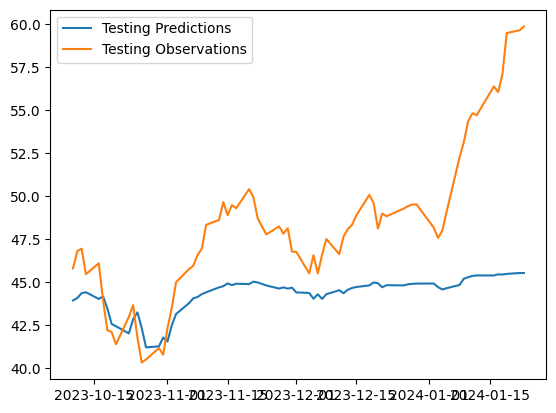

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

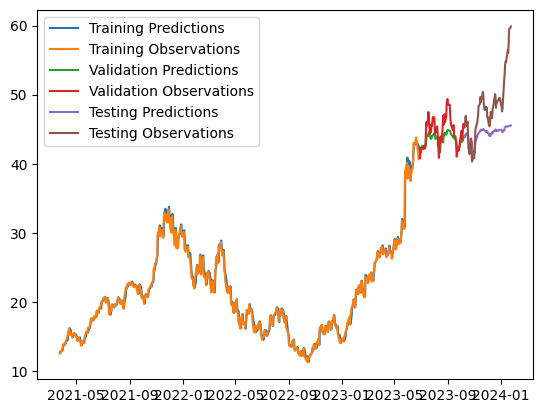

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])